# Градиенстный спуск

## Задача
Построить модель на основе полносвязных слоёв для классификации Fashion MNIST из библиотеки torchvision. Необходимо получить качество на тестовой выборке не ниже 88%.

## Загрузка и подготовка

Импортируем необходимые библиотеки и датасет.

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision as tv

BATCH_SIZE=256

In [2]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [20]:
test_dataset[0][0].shape

torch.Size([1, 28, 28])

## Первая модель.

In [58]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)

In [59]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
)

In [60]:
def train_model():
    '''
    Тренировка модели.
    '''
    for ep in range(1, num_epochs+1):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        
        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
            
        print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
            ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )

In [61]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=.01)
num_epochs = 10

In [62]:
train_model()

ep: 1, taked: 4.766, train_loss: 2.284312468386711, train_acc: 0.11751666666666667, test_loss: 2.2431917548179627, test_acc: 0.1578
ep: 2, taked: 5.201, train_loss: 2.179778913741416, train_acc: 0.28185, test_loss: 2.041858834028244, test_acc: 0.5181
ep: 3, taked: 4.828, train_loss: 1.8421260498939676, train_acc: 0.5290166666666667, test_loss: 1.4914940983057021, test_acc: 0.6684
ep: 4, taked: 4.888, train_loss: 1.2931256093877428, train_acc: 0.6767, test_loss: 0.9662528350949288, test_acc: 0.7961
ep: 5, taked: 4.847, train_loss: 0.939763638821054, train_acc: 0.7467333333333334, test_loss: 0.712499862909317, test_acc: 0.8295
ep: 6, taked: 5.066, train_loss: 0.7595611304678815, train_acc: 0.7839166666666667, test_loss: 0.5842926874756813, test_acc: 0.8519
ep: 7, taked: 5.155, train_loss: 0.6600855515358296, train_acc: 0.80925, test_loss: 0.5093049351125956, test_acc: 0.8674
ep: 8, taked: 4.875, train_loss: 0.5942722787248328, train_acc: 0.8276333333333333, test_loss: 0.45824135057628157

In [63]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 6.330, train_loss: 0.3786173457953524, train_acc: 0.88315, test_loss: 0.15616065703798085, test_acc: 0.9495
ep: 2, taked: 5.679, train_loss: 0.24484951465212285, train_acc: 0.9274666666666667, test_loss: 0.1348789922427386, test_acc: 0.9577
ep: 3, taked: 5.795, train_loss: 0.22168050585909094, train_acc: 0.9361333333333334, test_loss: 0.12387914414284751, test_acc: 0.9635
ep: 4, taked: 6.268, train_loss: 0.19549145232489767, train_acc: 0.9440666666666667, test_loss: 0.12647406458854676, test_acc: 0.9635
ep: 5, taked: 6.733, train_loss: 0.19061270887230305, train_acc: 0.94535, test_loss: 0.13646416328847408, test_acc: 0.9609
ep: 6, taked: 6.860, train_loss: 0.18231093885099633, train_acc: 0.9490333333333333, test_loss: 0.11727309676934965, test_acc: 0.9664
ep: 7, taked: 6.834, train_loss: 0.1796337368799017, train_acc: 0.94995, test_loss: 0.10679032686166465, test_acc: 0.9694
ep: 8, taked: 6.682, train_loss: 0.166527675234891, train_acc: 0.9542166666666667, test_loss: 0.09

Добавим батч-нормализацию перед слоем активации.

In [75]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 6.602, train_loss: 0.3233366739084112, train_acc: 0.90195, test_loss: 0.15605042346287518, test_acc: 0.9547
ep: 2, taked: 6.939, train_loss: 0.18420262711637833, train_acc: 0.9454333333333333, test_loss: 0.10915142405719962, test_acc: 0.9697
ep: 3, taked: 7.172, train_loss: 0.15176170459611618, train_acc: 0.9564166666666667, test_loss: 0.11222014480736106, test_acc: 0.9694
ep: 4, taked: 7.040, train_loss: 0.13049063894184346, train_acc: 0.9610833333333333, test_loss: 0.09786849673619144, test_acc: 0.9733
ep: 5, taked: 7.422, train_loss: 0.11659994887861799, train_acc: 0.9658833333333333, test_loss: 0.08508275661079097, test_acc: 0.9747
ep: 6, taked: 7.123, train_loss: 0.10495939861111184, train_acc: 0.9687666666666667, test_loss: 0.07159481739108742, test_acc: 0.9783
ep: 7, taked: 6.684, train_loss: 0.09735417232075905, train_acc: 0.96995, test_loss: 0.07144434915389866, test_acc: 0.9789
ep: 8, taked: 6.601, train_loss: 0.09197927638095744, train_acc: 0.9719333333333333, 

Вывод. Сходимость функции потерь стала гораздо лучше чем в предыдущих примерах. Такая комбинация слоем показала наилучший результат. Можем использовать модель для дальнейшего использования. Итоговый показатель Accuracy = 0.9804

In [77]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 8.212, train_loss: 0.31457332226824253, train_acc: 0.9055833333333333, test_loss: 0.11775682760053315, test_acc: 0.9636
ep: 2, taked: 7.502, train_loss: 0.17292958326796268, train_acc: 0.9472333333333334, test_loss: 0.10323106642754283, test_acc: 0.9667
ep: 3, taked: 7.451, train_loss: 0.13782829474261465, train_acc: 0.9575833333333333, test_loss: 0.09409023160551441, test_acc: 0.9712
ep: 4, taked: 6.400, train_loss: 0.11944178963436726, train_acc: 0.9635833333333333, test_loss: 0.08429215977375862, test_acc: 0.9743
ep: 5, taked: 6.937, train_loss: 0.10823463167044077, train_acc: 0.9670333333333333, test_loss: 0.07176419165043627, test_acc: 0.9773
ep: 6, taked: 6.393, train_loss: 0.09372195159976787, train_acc: 0.97195, test_loss: 0.07170225621302961, test_acc: 0.9778
ep: 7, taked: 6.756, train_loss: 0.09004350784135626, train_acc: 0.9723666666666667, test_loss: 0.07073608417631476, test_acc: 0.9797
ep: 8, taked: 7.136, train_loss: 0.08311503536285872, train_acc: 0.974033

Данный вариант конфигурации показывает лучшую сходимость функции потерь и показетель точности 0.9827. Пока лучший результат. Пробуем улучшить. 

Добавим дополнительные слои с 64 нейронами.

In [80]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 64),
    # torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),
    # torch.nn.Dropout(0.5),
    torch.nn.Linear(64, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 6.727, train_loss: 0.339061280696633, train_acc: 0.8983833333333333, test_loss: 0.14901003644336014, test_acc: 0.9549
ep: 2, taked: 6.741, train_loss: 0.1844474326105828, train_acc: 0.9454666666666667, test_loss: 0.10154505901155061, test_acc: 0.9707
ep: 3, taked: 6.411, train_loss: 0.14702419815386863, train_acc: 0.9559833333333333, test_loss: 0.09121468414668925, test_acc: 0.9735
ep: 4, taked: 6.540, train_loss: 0.12892378220691325, train_acc: 0.9612666666666667, test_loss: 0.08840498240679154, test_acc: 0.9717
ep: 5, taked: 6.689, train_loss: 0.1147873673033207, train_acc: 0.9659833333333333, test_loss: 0.07671520988515113, test_acc: 0.9754
ep: 6, taked: 6.539, train_loss: 0.10443803275677752, train_acc: 0.9683333333333334, test_loss: 0.08494598445249721, test_acc: 0.9753
ep: 7, taked: 6.348, train_loss: 0.0944685771268733, train_acc: 0.9719, test_loss: 0.07572755718501867, test_acc: 0.9791
ep: 8, taked: 6.593, train_loss: 0.0908755191027167, train_acc: 0.9723166666666

## Итоги

Лучший результат у модели ниже с оптимизатором Adam. Самая лучшая сходимость и точность. 
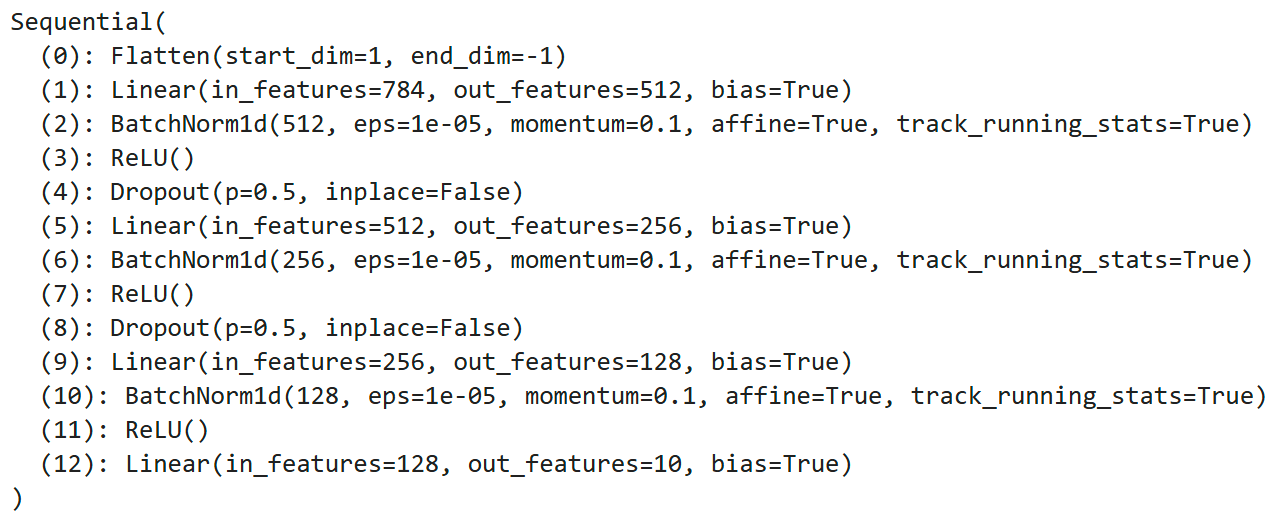
taked: 6.609, train_loss: 0.07142643116890116, train_acc: 0.9778166666666667, test_loss: 0.06589928646499174, test_acc: 0.9807


In [87]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 7.526, train_loss: 0.31055006803350244, train_acc: 0.90555, test_loss: 0.13486686402466147, test_acc: 0.959
ep: 2, taked: 7.275, train_loss: 0.17358609082851004, train_acc: 0.9473333333333334, test_loss: 0.1036983209050959, test_acc: 0.9676
ep: 3, taked: 6.430, train_loss: 0.13849496160574415, train_acc: 0.9574, test_loss: 0.09088071671285433, test_acc: 0.9711
ep: 4, taked: 6.938, train_loss: 0.11895756627175402, train_acc: 0.9638666666666666, test_loss: 0.08260645586415194, test_acc: 0.9747
ep: 5, taked: 6.676, train_loss: 0.10179845098247553, train_acc: 0.9690666666666666, test_loss: 0.07161076524789678, test_acc: 0.9776
ep: 6, taked: 7.039, train_loss: 0.09492988156828475, train_acc: 0.9707333333333333, test_loss: 0.0764099904539762, test_acc: 0.9777
ep: 7, taked: 6.646, train_loss: 0.08758538316816408, train_acc: 0.9734833333333334, test_loss: 0.06956866832988454, test_acc: 0.9784
ep: 8, taked: 6.350, train_loss: 0.08243634447138361, train_acc: 0.9740166666666666, tes

In [85]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=512, out_features=256, bias=True)
  (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=256, out_features=128, bias=True)
  (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=10, bias=True)
)